# Caltech Machine Learning Homework # 5

In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
import random
import math
import matplotlib.pyplot as plt
from typing import List
from itertools import product
import scipy.special
from scipy import optimize
import scipy.optimize as spo
from sympy import Symbol, Derivative

def dbg():
    import pdb; pdb.set_trace()

Instructions: https://work.caltech.edu/homework/hw5.pdf

Answers: http://work.caltech.edu/homework/hw5_sol.pdf

## Linear Regression Error

![](imgs/linregerr.png)

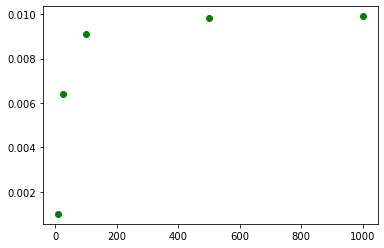

In [4]:
sigma = 0.1
d = 8

E_D = lambda N: (sigma ** 2) * (1 - (d+1) / N)

N = np.array([10, 25, 100, 500, 1000])

plt.plot(N, E_D(N), 'og')
plt.show()

Looks like the answer is **[c] 100**

## Nonlinear Transforms

![](imgs/nonlinear.png)

Hmm, looks like a hyperbola, which I know nothing about, but from google the equation for a hyperobla in x1,x2 space involves both squared parameters, so both weights should be != 0.

That leaves [c], [d] and [e] as possible answers

Looking at the Wolframalpha graph for a general hyperbola that matches this shape

![](imgs/hyperb1.png)

Hmm I'm not sure how to arrive at the correct answer mathematically, so let's build the three classifiers and test them:


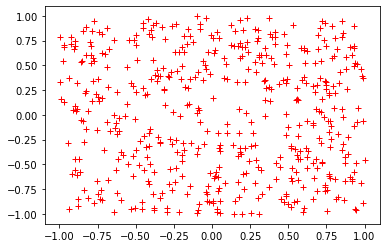

In [33]:
arbitrary_w_0 = 1
weights_c = np.array([arbitrary_w_0, 10, 10])

N = 500
X1 = np.random.uniform(-1, 1, N)
X2 = np.random.uniform(-1, 1, N)
Z = np.array([np.ones(N), np.power(X1, 2), np.power(X2, 2)]).T

plusses = []
minusses = []

for i, z in enumerate(Z):
    if (np.sign(np.dot(z, weights_c))) == 1:
        plusses.append(i)
    else:
        minusses.append(i)
        
plt.plot(X1[plusses], X2[plusses], 'r+')
plt.plot(X1[minusses], X2[minusses], 'b_')
plt.show()

No separation happening, so [c] doesn't look like the answer.

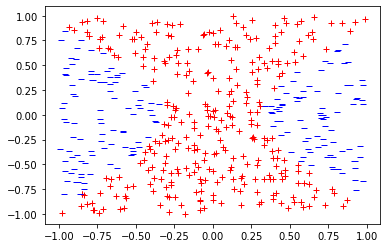

In [36]:
arbitrary_w_0 = 1
weights_d = np.array([arbitrary_w_0, -10, 10])

N = 500
X1 = np.random.uniform(-1, 1, N)
X2 = np.random.uniform(-1, 1, N)
Z = np.array([np.ones(N), np.power(X1, 2), np.power(X2, 2)]).T

plusses = []
minusses = []

for i, z in enumerate(Z):
    if (np.sign(np.dot(z, weights_d))) == 1:
        plusses.append(i)
    else:
        minusses.append(i)
        
plt.plot(X1[plusses], X2[plusses], 'r+')
plt.plot(X1[minusses], X2[minusses], 'b_')
plt.show()

That looks more like it. What does [e] say?

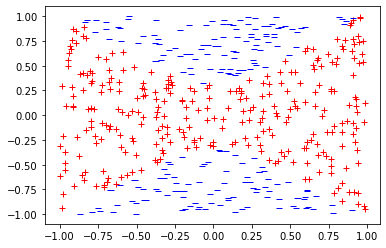

In [38]:
arbitrary_w_0 = 1
weights_e = np.array([arbitrary_w_0, 10, -10])

N = 500
X1 = np.random.uniform(-1, 1, N)
X2 = np.random.uniform(-1, 1, N)
Z = np.array([np.ones(N), np.power(X1, 2), np.power(X2, 2)]).T

plusses = []
minusses = []

for i, z in enumerate(Z):
    if (np.sign(np.dot(z, weights_e))) == 1:
        plusses.append(i)
    else:
        minusses.append(i)
        
plt.plot(X1[plusses], X2[plusses], 'r+')
plt.plot(X1[minusses], X2[minusses], 'b_')
plt.show()

That's the flipped hyperbola. So looks like [d] is the answer!

![](imgs/nonlinear2.png)

From Lecture 9, the $d_{VC}$ of a nonlinear transform is $\leqslant  \tilde{d} \ +\ 1$

The number of terms in $\phi _{4}$ is 15, so $d_{VC} \leqslant 16$

So I'd go for **[d] 20**

Ah, probably wrong because I counted the constant term, correct answer is **[c]**

![](imgs/gradient_descent1.png)

![](imgs/partderiv1.png)

Multiplying the $e^{-2u}$ term back in gives

$2(ue^{v-u} - 2 v e^{-2u})(e^{v-u}+2 v e^{-2u})$

...which doesn't immediately look like any of the answers above. Let's compare them numerically.

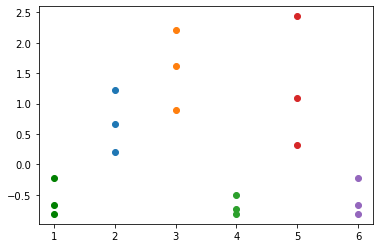

In [20]:
u = np.array([1, 2, 3])
v = np.array([-1, -2, -3])

sol_wolf = lambda u,v: 2 * np.exp(-2*u) * (np.exp(u + v)*u - 2*v)*(np.exp(u + v) + 2 * v)
a = lambda u,v: np.power(u*np.exp(v) - 2 * v * np.exp(-u), 2)
b = lambda u,v: 2 * (u*np.exp(v) - 2 * v * np.exp(-u))
c = lambda u,v: 2 * (np.exp(v) + 2 * v * np.exp(-u))
d = lambda u,v: 2 * (np.exp(v) - 2*v*np.exp(-u)) * (u*np.exp(v) - 2*v*np.exp(-u))
e = lambda u,v: 2 * (np.exp(v) + 2*v*np.exp(-u)) * (u*np.exp(v) - 2*v*np.exp(-u))


plt.plot([1, 1, 1], sol_wolf(u, v), 'go')
plt.plot([2, 2, 2], a(u, v), 'o')
plt.plot([3, 3, 3], b(u, v), 'o')
plt.plot([4, 4, 4], c(u, v), 'o')
plt.plot([5, 5, 5], d(u, v), 'o')
plt.plot([6, 6, 6], e(u, v), 'o')
plt.show()

Looks like **[e]** is the answer.

![](imgs/gradient_descent2.png)

The inital weights are given by the problem as

In [17]:
W = np.array([1.0, 1.0])

E = lambda W: np.power( W[0] * np.exp(W[1]) - 2 * W[1] * np.exp(-W[0]), 2 )
dE_du = lambda u,v: 2 * np.exp(-2*u) * (np.exp(u + v)*u - 2*v)*(np.exp(u + v) + 2 * v) # From above
dE_dv = lambda u,v: 2 * np.exp(-2*u) * (np.exp(u + v)*u - 2)*(u*np.exp(u + v) - 2 * v) # From WolframAlpha

LR = .1
i = 0

while (E(W) >= 1e-14):
    print(f"W is {W} before step {i} with E={E(W)}")
    newU = W[0] - LR * dE_du(W[0], W[1])
    newV = W[1] - LR * dE_dv(W[0], W[1])
    W[0] = newU
    W[1] = newV
    i += 1
    
print(f"Desired err reached at iteration {i}")

W is [1. 1.] before step 0 with E=3.9303972318771003
W is [-0.36954299  0.21392055] before step 1 with E=1.1595097299694377
W is [ 0.03052069 -0.50793405] before step 2 with E=1.007407482962702
W is [ 0.10752311 -0.12221026] before step 3 with E=0.0990091216272555
W is [ 0.06564483 -0.01516656] before step 4 with E=0.00866064536281207
W is [0.04784117 0.0184899 ] before step 5 with E=0.00018175579172801507
W is [0.04499946 0.02349925] before step 6 with E=1.2972398478441715e-06
W is [0.04475602 0.0239243 ] before step 7 with E=7.291524698456784e-09
W is [0.04473775 0.02395617] before step 8 with E=4.009997890552925e-11
W is [0.04473639 0.02395854] before step 9 with E=2.2016834484097367e-13
Desired err reached at iteration 10


That's **[d]**

![](imgs/gradient_descent3.png)

In [26]:
(W[0], W[1])

(0.044736290397782055, 0.023958714099141746)

That's **[e]**

![](imgs/gradient_descent4.png)

This sounds more "squarish" and clunkier, so I'm predicting that "coordinate descent" shall perform worse. (Either [a] or [b])

Let's see!

In [28]:
W = np.array([1.0, 1.0])

E = lambda W: np.power( W[0] * np.exp(W[1]) - 2 * W[1] * np.exp(-W[0]), 2 )
dE_du = lambda u,v: 2 * np.exp(-2*u) * (np.exp(u + v)*u - 2*v)*(np.exp(u + v) + 2 * v) # From above
dE_dv = lambda u,v: 2 * np.exp(-2*u) * (np.exp(u + v)*u - 2)*(u*np.exp(u + v) - 2 * v) # From WolframAlpha

LR = .1
i = 0

for i in range(15):
    W[0] = W[0] - LR * dE_du(W[0], W[1]) # Step 1
    W[1] = W[1] - LR * dE_dv(W[0], W[1]) # Step 2
    
print(f"Err reached after 15 full iterations: {E(W)}")

Err reached after 15 full iterations: 0.13981379199615296


Looks like the answer is indeed **[a]**

![](imgs/logreg1.png)

In [2]:
def set_axis_cartesian():
    ax = plt.figure().add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

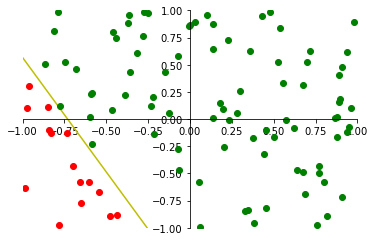

Average E_OUT after 100 runs was 0.10458570446852171
Average # of epochs after 100 runs was 343.22


In [45]:
EXPERIMENTS = 100
N = 100
N_TEST = 1000
LR = .01
STOP_THRESHOLD = .01

def crossentropy(W):
    sum = 0
    # Generate a new set of random "validation" points
    X = np.c_[np.ones(N_TEST), np.random.uniform(-1, 1, N_TEST), np.random.uniform(-1, 1, N_TEST)]
    Y = np.apply_along_axis(y, 1, (X[:,1:]))
    
    for n in range(N_TEST):
        sum += np.log(1 + np.exp(-Y[n] * np.dot(W.T, X[n])))
    
    return sum / N_TEST

E_OUTS = []
EPOCHS = []

for run in range(EXPERIMENTS):
    # Generate a target function (see HW1 for explanations)
    x1 = np.random.uniform(-1, 1, 2)
    x2 = np.random.uniform(-1, 1, 2)
    m = (x1[1] - x2[1]) / (x1[0] - x2[0])
    c = x1[1] - m*x1[0]
    def y(X):
        x, y = X
        return 1 if y > m*x+c else -1
    
    W = np.zeros(3)
    X = np.c_[np.ones(N), np.random.uniform(-1, 1, N), np.random.uniform(-1, 1, N)]
    Y = np.apply_along_axis(y, 1, (X[:,1:]))

    if run == 0:
        pltpoints = np.linspace(-1, 1, 100)
        set_axis_cartesian()
        plt.plot(pltpoints, m*pltpoints+c, 'y-')
        plt.plot(X[Y==1,1], X[Y==1,2], 'go')
        plt.plot(X[Y==-1,1], X[Y==-1,2], 'ro')
        plt.show()
    


    # Epoch starts here
    epochs = 0
    while True:
        old_W = W # W at t-1
        
        # Shuffle the input data
        shuffleIdxs = np.random.permutation(N)
        X = X[shuffleIdxs]
        Y = Y[shuffleIdxs]

        # SGD
        for n in range(N):
            grad_Ein = ( -Y[n]*X[n] ) / ( 1 + np.exp(Y[n]*np.dot(W.T, X[n])) )
            W = W - LR * grad_Ein
            
        epochs += 1
        if (np.linalg.norm(old_W - W) < STOP_THRESHOLD):
            break

    # Compute E_OUT and add to averages
    E_OUT = crossentropy(W)
    E_OUTS.append(E_OUT)
    
    # Remember number of epochs used
    EPOCHS.append(epochs)
    
print(f"Average E_OUT after {EXPERIMENTS} runs was {sum(E_OUTS)/len(E_OUTS)}")
print(f"Average # of epochs after {EXPERIMENTS} runs was {sum(EPOCHS)/len(EPOCHS)}")

So the answers should be **[d]** and **[a]**